In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn.apionly as sns

/opt/conda/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/opt/conda/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/opt/conda/lib/python3.7/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


# Nice Boosting

## Regression

In [3]:
x = np.arange(0, 2*np.pi, 0.1)
y = np.sin(x) + 0.1*np.random.normal(size=x.shape[0],)

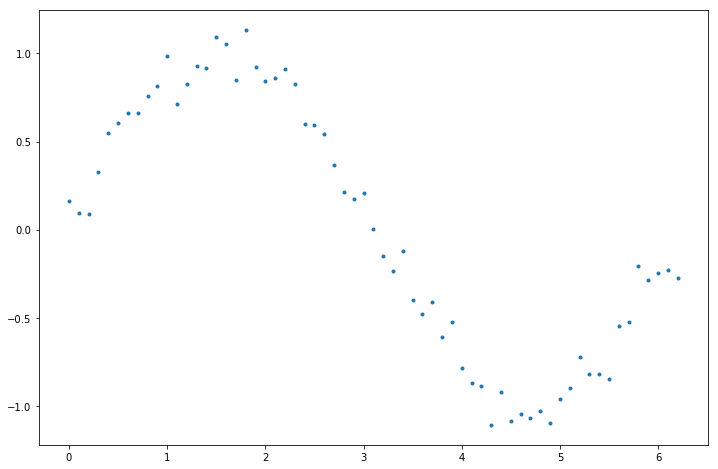

In [4]:
plt.figure(figsize=(12, 8))
plt.plot(x,y, '.');

In [5]:
from sklearn.ensemble import GradientBoostingRegressor

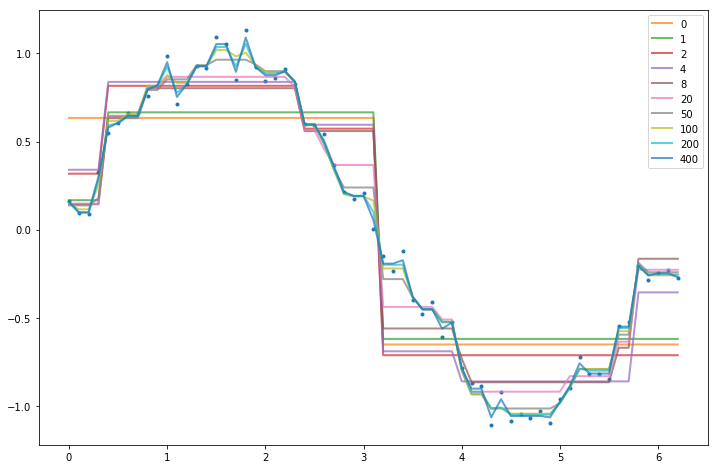

In [6]:
import time
from IPython import display
estgb = GradientBoostingRegressor(n_estimators=500, max_depth=1, learning_rate=1.0)
estgb.fit(x.reshape(-1,1), y)
staged_predict_generator = estgb.staged_predict(x.reshape(-1,1))
plt.figure(figsize=(12, 8))
plt.plot(x, y, '.');
i = 0 
counter = 0
for stagepred in staged_predict_generator:
    if i in [0, 1, 2, 4, 8, 20, 50, 100, 200, 400, 500]:
        plt.plot(x, stagepred, alpha=0.7, label=str(i), lw=2)
        plt.legend();
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(2 - counter*0.1)
        counter = counter + 1
    i = i + 1


Ok, so this demonstration helps us understand some things about GBRT.

- n_estimators is the number of trees, and thus the stage in the fitting. It also controls the complexity for us. The more trees we have the more we fit to the tiny details.
- staged_predict gives us the prediction at each step
- once again max_depth from the underlying decision tree tells us the depth of the tree. But here it tells us the amount of features interactions we have, not just the scale of our fit. But clearly it increases the variance again.
- Ideas from decision trees remain. For example, increase min_samples_leaf to increase the bias.

**Demonstrate what happens when you increase max_depth to 5**

In [ ]:
# your code here

**What happens if you put max_depth back to 1 and decrease the learning rate to 0.1?**

In [ ]:
# your code here

## Classification

Viz codes from https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176 and Jake Vanderplas's tutorials

In [7]:
df = pd.read_csv("data/lendingtree.csv")
df

,Income,Credit,Repay
0,85,620,1
1,108,648,1
2,60,682,1
3,110,701,1
4,69,731,1
5,81,716,1
6,93,749,1
7,61,752,1
8,65,767,1
9,52,788,1


In [8]:
y = df.Repay.values
X = df[['Income', 'Credit']].values

In [9]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# Plot tree containing only two covariates
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #

from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def plot_2tree(X, y, clf, lab = ['Feature 1', 'Feature 2'], alpha=0.4):
    # Create a meshgrid as our test data
    ax= plt.figure(figsize = (12, 8))
    plot_step_x= 0.1
    plot_step_y= 1
    xmin, xmax= X[:,0].min(), X[:,0].max()
    ymin, ymax= X[:,1].min(), X[:,1].max()
    xx, yy = np.meshgrid(np.arange(xmin, xmax, plot_step_x), np.arange(ymin, ymax, plot_step_y) )

    # Re-cast every coordinate in the meshgrid as a 2D point
    Xplot= np.c_[xx.ravel(), yy.ravel()]


    # Predict the class
    Z = clf.predict( Xplot )

    # Re-shape the results
    Z= Z.reshape( xx.shape )
    cs = plt.contourf(xx, yy, Z, cmap= cmap_light, alpha=0.3)
  
    # Overlay training samples
    plt.scatter(X[:, 0], X[:, 1], c=y-1, cmap=cmap_bold, alpha=alpha,edgecolor="k") 
    
    plt.xlabel(lab[0])
    plt.ylabel(lab[1])
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    return ax, xmin, xmax, ymin, ymax

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
d = DecisionTreeClassifier(max_depth=3)
dtreegb = AdaBoostClassifier(d,
            n_estimators=200,
            learning_rate=0.5)
dtreegb.fit(X, y)
dtreegb

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=None)

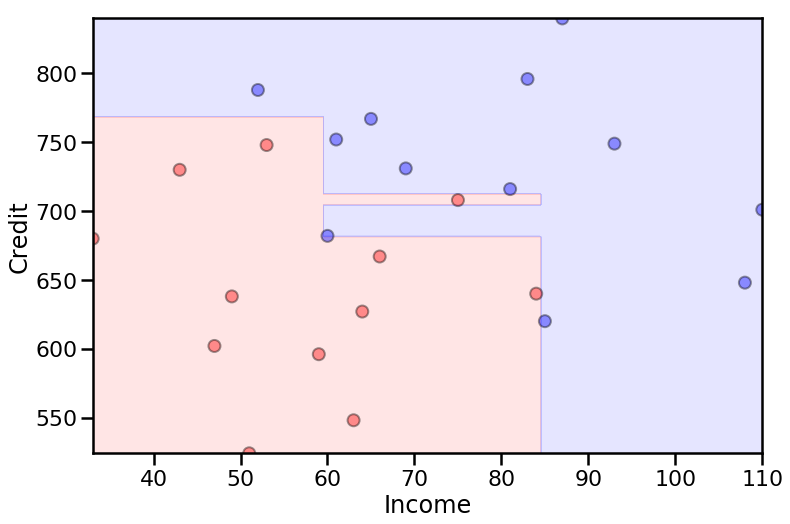

In [11]:
with sns.plotting_context('poster'):
    axs=plot_2tree(X, y, dtreegb, lab = ['Income', 'Credit'])

In [12]:
def plot_2gbtree(X, y, clf, matches, lab = ['Feature 1', 'Feature 2'], alpha=0.4):
    # Create a meshgrid as our test data

    plot_step_x= 0.1
    plot_step_y= 1
    xmin, xmax= X[:,0].min(), X[:,0].max()
    ymin, ymax= X[:,1].min(), X[:,1].max()
    xx, yy = np.meshgrid(np.arange(xmin, xmax, plot_step_x), np.arange(ymin, ymax, plot_step_y) )

    # Re-cast every coordinate in the meshgrid as a 2D point
    Xplot= np.c_[xx.ravel(), yy.ravel()]


    # Predict the class
    figs = []
    for i, pred in enumerate(clf.staged_predict(Xplot)):
        if i in matches:
            #fig= plt.figure(figsize = (12, 8))
            Z = pred

            # Re-shape the results
            Z= Z.reshape( xx.shape )
            fig= plt.figure(figsize = (12, 8))                         
            cs = plt.contourf(xx, yy, Z, cmap= cmap_light, alpha=0.3)

            # Overlay training samples
            plt.scatter(X[:, 0], X[:, 1], c=y-1, cmap=cmap_bold, alpha=alpha,edgecolor="k") 

            plt.xlabel(lab[0])
            plt.ylabel(lab[1])
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
            plt.title("Stage {}".format(i))
            figs.append(fig)
            plt.savefig("figs/gbt{0:02d}.png".format(i))
        
    return figs, xmin, xmax, ymin, ymax

([<Figure size 864x576 with 1 Axes>,
  <Figure size 864x576 with 1 Axes>,
  <Figure size 864x576 with 1 Axes>,
  <Figure size 864x576 with 1 Axes>],
 33,
 110,
 524,
 840)

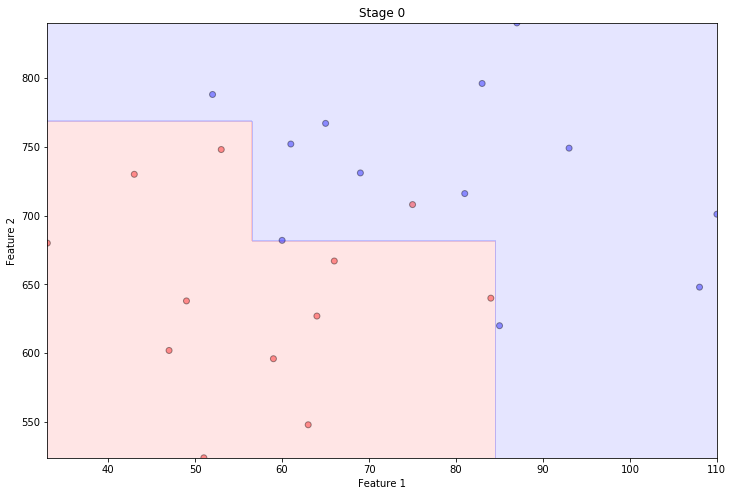

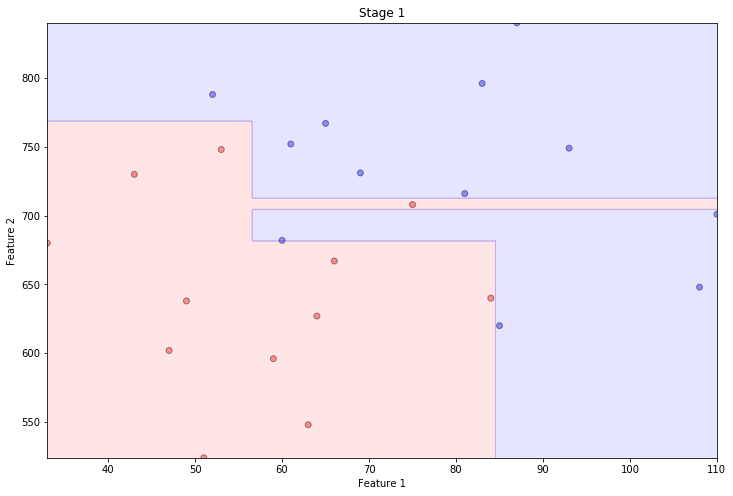

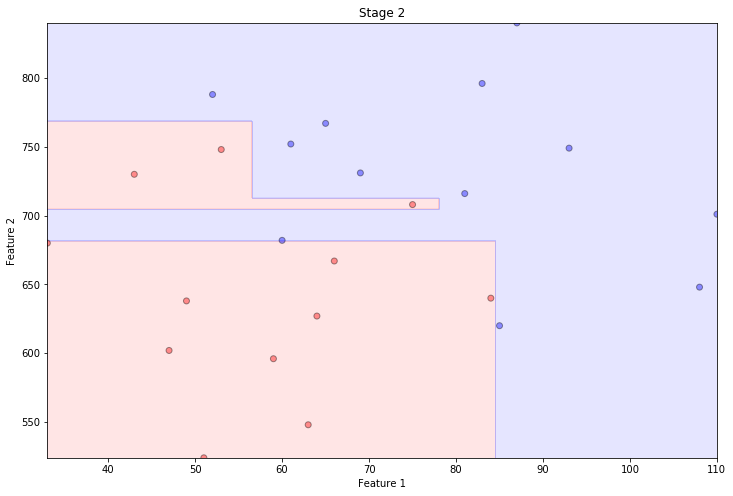

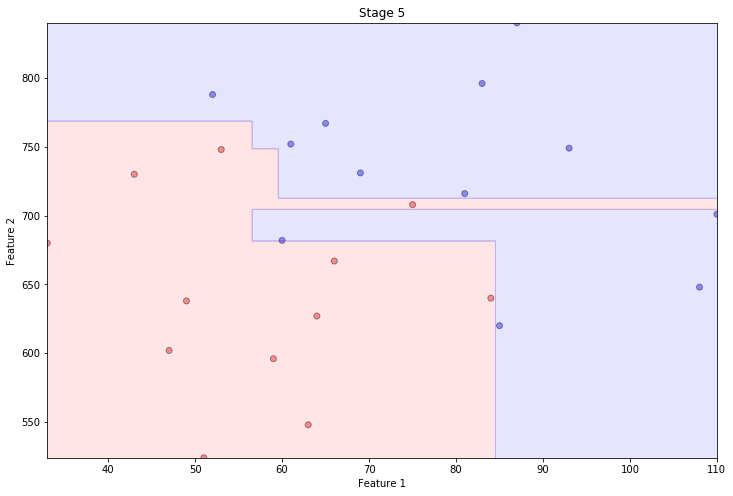

In [13]:
plot_2gbtree(X, y, dtreegb, [0, 1, 2, 5, 10, 100, 150, 199])

In [14]:
ts = [t for i, t in enumerate(dtreegb.estimators_) if i in [0, 1, 2, 5, 10, 100, 150, 199]]

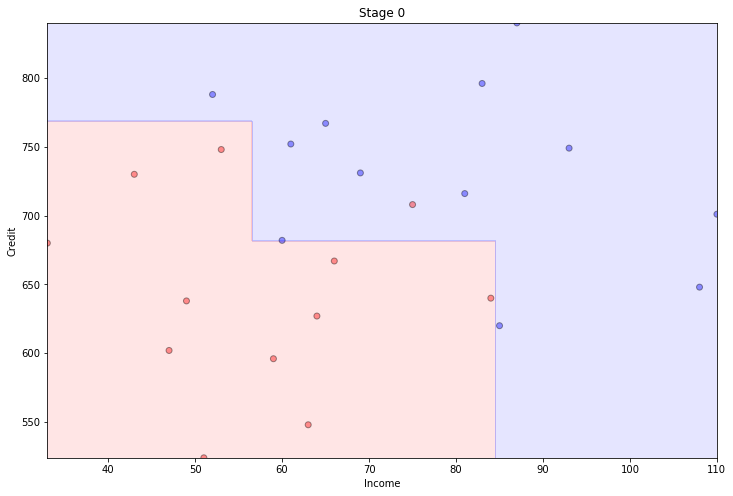

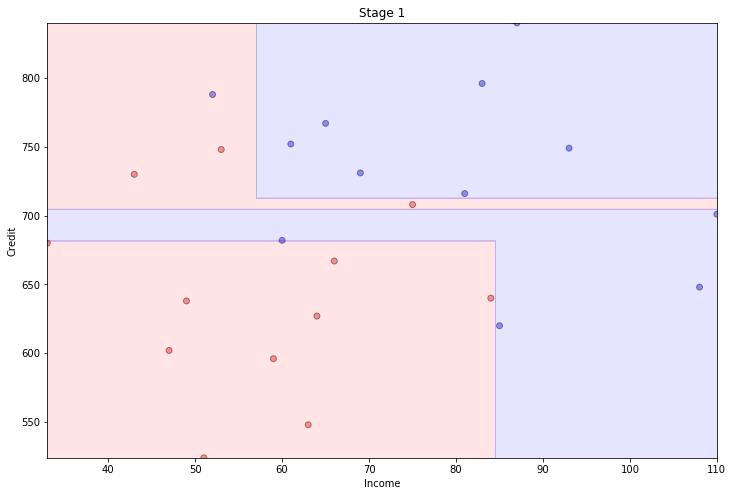

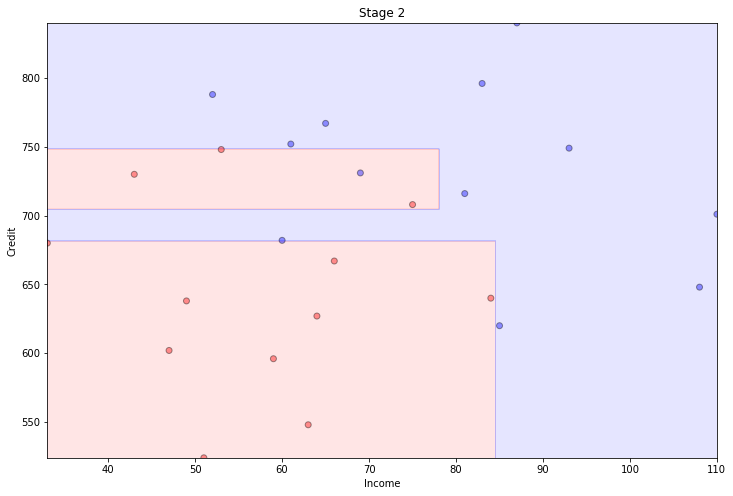

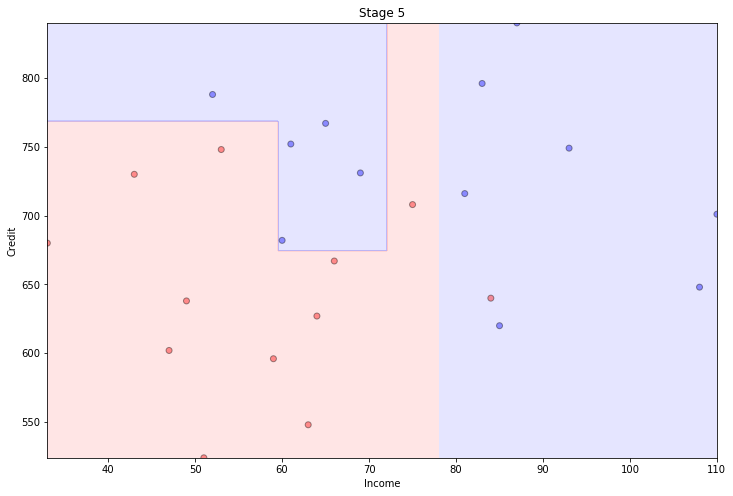

In [15]:
for i, t in zip([0, 1, 2, 5, 10, 100, 150, 199], ts):
    plot_2tree(X, y, t, lab = ['Income', 'Credit'])
    plt.title("Stage {}".format(i))

In [22]:
from sklearn.utils import check_array, check_X_y, check_random_state
from sklearn.base import is_regressor, is_classifier
from sklearn.ensemble.forest import BaseForest
from sklearn.tree.tree import BaseDecisionTree
from sklearn.tree._tree import DTYPE

def adbfit(est, X, y, sample_weight=None):
        """Build a boosted classifier/regressor from the training set (X, y).
        Parameters
        ----------
        X : {array-like, sparse matrix} of shape = [n_samples, n_features]
            The training input samples. Sparse matrix can be CSC, CSR, COO,
            DOK, or LIL. COO, DOK, and LIL are converted to CSR. The dtype is
            forced to DTYPE from tree._tree if the base classifier of this
            ensemble weighted boosting classifier is a tree or forest.
        y : array-like of shape = [n_samples]
            The target values (class labels in classification, real numbers in
            regression).
        sample_weight : array-like of shape = [n_samples], optional
            Sample weights. If None, the sample weights are initialized to
            1 / n_samples.
        Returns
        -------
        est : object
        """
        # Check parameters
        if est.learning_rate <= 0:
            raise ValueError("learning_rate must be greater than zero")

        if (est.base_estimator is None or
                isinstance(est.base_estimator, (BaseDecisionTree,
                                                 BaseForest))):
            dtype = DTYPE
            accept_sparse = 'csc'
        else:
            dtype = None
            accept_sparse = ['csr', 'csc']

        X, y = check_X_y(X, y, accept_sparse=accept_sparse, dtype=dtype,
                         y_numeric=is_regressor(est))

        if sample_weight is None:
            # Initialize weights to 1 / n_samples
            sample_weight = np.empty(X.shape[0], dtype=np.float64)
            sample_weight[:] = 1. / X.shape[0]
        else:
            sample_weight = check_array(sample_weight, ensure_2d=False)
            # Normalize existing weights
            sample_weight = sample_weight / sample_weight.sum(dtype=np.float64)

            # Check that the sample weights sum is positive
            if sample_weight.sum() <= 0:
                raise ValueError(
                    "Attempting to fit with a non-positive "
                    "weighted number of samples.")

        # Check parameters
        est._validate_estimator()

        # Clear any previous fit results
        est.estimators_ = []
        est.estimator_weights_ = np.zeros(est.n_estimators, dtype=np.float64)
        est.estimator_errors_ = np.ones(est.n_estimators, dtype=np.float64)
        est.sw_ = np.zeros((est.n_estimators, X.shape[0]), dtype=np.float64)
        random_state = check_random_state(est.random_state)

        for iboost in range(est.n_estimators):
            est.sw_[iboost] = np.copy(sample_weight)
            # Boosting step
            sample_weight, estimator_weight, estimator_error = est._boost(
                iboost,
                X, y,
                sample_weight,
                random_state)

            # Early termination
            if sample_weight is None:
                break

            est.estimator_weights_[iboost] = estimator_weight
            est.estimator_errors_[iboost] = estimator_error

            # Stop if error is zero
            if estimator_error == 0:
                break

            sample_weight_sum = np.sum(sample_weight)

            # Stop if the sum of sample weights has become non-positive
            if sample_weight_sum <= 0:
                break

            if iboost < est.n_estimators - 1:
                # Normalize
                sample_weight /= sample_weight_sum
                
        return est

In [17]:
def plotlinestree(X, y, dt, i, s, bw, w, lab = ['Income', 'Credit']):
    nn, nd, f, t, il, ile, iri, p = est_structure(dt)
    with sns.plotting_context('poster'):
        fig, xmin, xmax, ymin, ymax = plot_2tree2(X, y, dt, i, s, bw, w, lab)
        xra = xmax-xmin
        yra = ymax-ymin
        plt.title("dtree depth {}, iteration {}".format(nn, i))
        for j in range(nn):
            if j==0 and p[j]==0:
                print("top", f[j])
                if f[j]==0:
                    plt.axvline(t[j], 0, 1, c='k')
                elif f[j]==1:
                    plt.axhline(t[j],0, 1, c='k')
            else:
                print("not top", f[j])
                if f[j]==0:
                    print("feat0", j, ile[j], iri[j], p[j])
                    print(j, t[j], p[j], t[p[j]], yra, t[p[j]]/yra)
                    if f[p[j]] == f[j]:
                        pee = p[j]
                        left = ile[j]
                        right = iri[j]
                        while(f[pee] == f[j]):
                            left = ile[pee]
                            right = iri[pee]
                            pee = p[pee]
                    else:
                        pee = p[j]
                        left = ile[j]
                        right = iri[j]
                    if left:
                        plt.axvline(t[j], 0, (t[pee] - ymin)/yra, c='k')
                    elif right:
                        plt.axvline(t[j], (t[pee]-ymin)/yra, 1, c='k')
                elif f[j]==1:
                    print("feat1", j, ile[j], iri[j], p[j])
                    print(f[j], f[p[j]])
                    print(j, t[j], p[j], t[p[j]], xra, t[p[j]]/xra)
                    if f[p[j]] == f[j]:
                        pee = p[j]
                        left = ile[j]
                        right = iri[j]
                        while(f[pee] == f[j]):
                            left = ile[pee]
                            right = iri[pee]
                            pee = p[pee]
                    else:
                        pee = p[j]
                        left = ile[j]
                        right = iri[j]
                    if left:
                        print("<<", pee, p[j], (t[pee] - xmin)/xra)
                        plt.axhline(t[j], 0, (t[pee]-xmin)/xra, c='k')
                    elif right:
                        print(">>", pee, p[j],(t[pee] - xmin)/xra)
                        plt.axhline(t[j], (t[pee]-xmin)/xra, 1, c='k')
                

## Gradient Boosting fit

In [18]:
d2 = DecisionTreeClassifier(max_depth=1)
#earlier weights were 0.2
learn=1.0
dtreegb2 = AdaBoostClassifier(d2,
            n_estimators=20,
            algorithm='SAMME',
            learning_rate=learn)
dtreegb2 = adbfit(dtreegb2, X, y)

In [19]:
n_trees = len(list(dtreegb2.estimators_))
n_trees

20

In [20]:
scores = []
for e in dtreegb2.staged_score(X, y):
    scores.append(e)

In [21]:
scores

[0.7916666666666666,
 0.75,
 0.8333333333333334,
 0.875,
 0.875,
 0.9166666666666666,
 0.875,
 0.9583333333333334,
 0.9583333333333334,
 0.9583333333333334,
 0.9583333333333334,
 0.9583333333333334,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

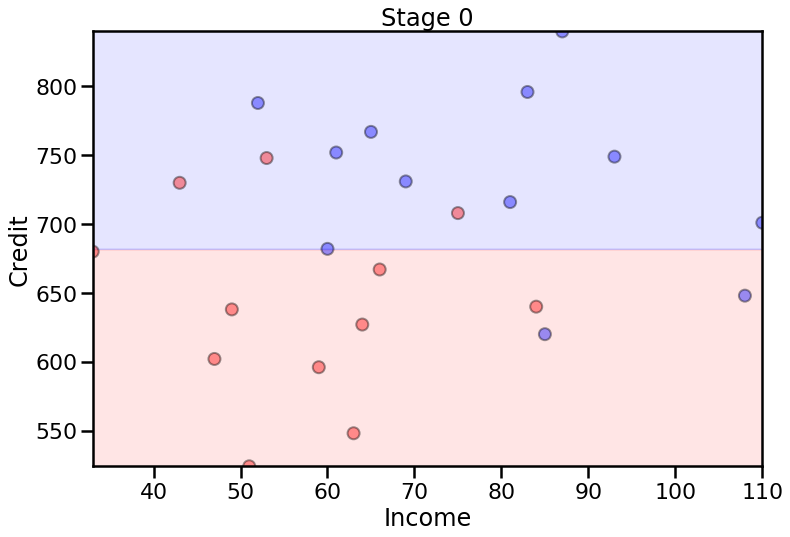

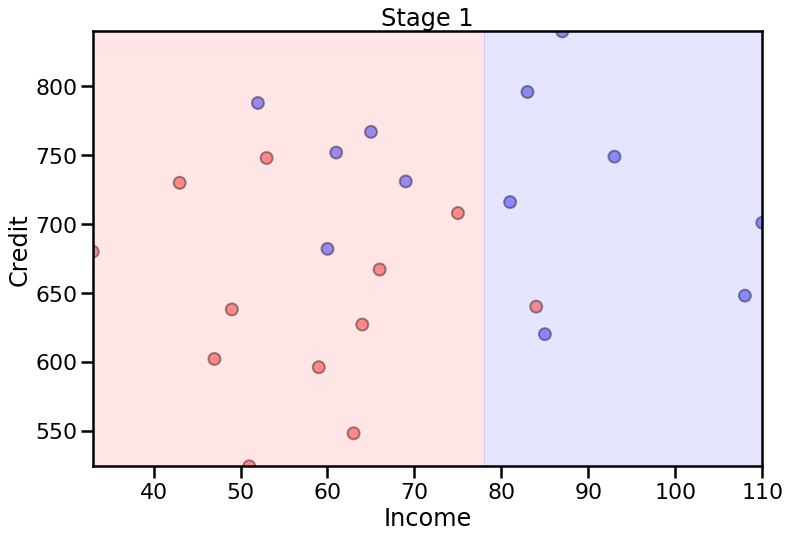

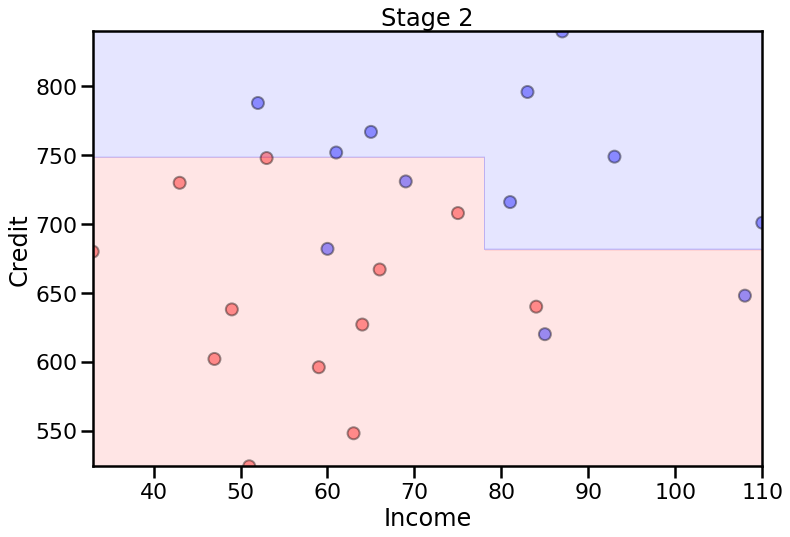

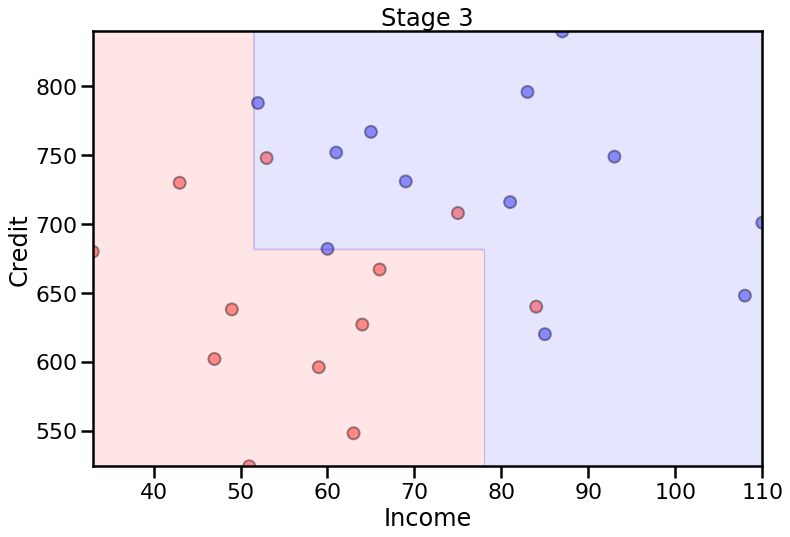

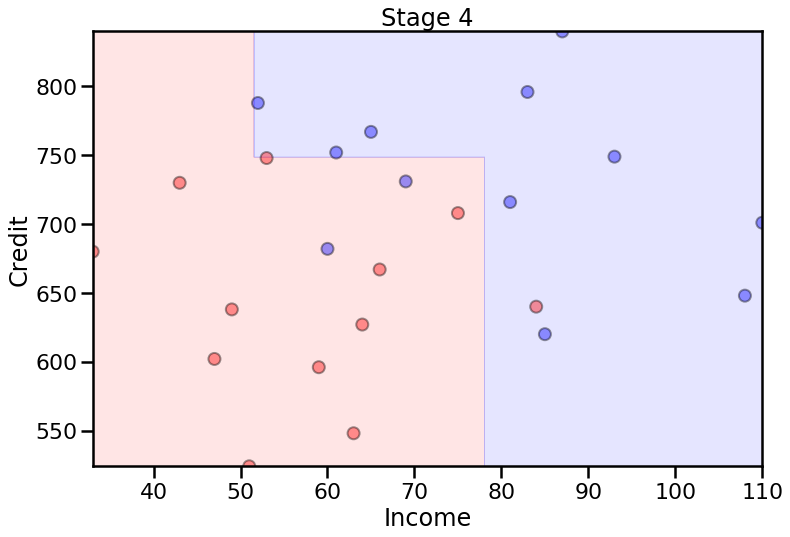

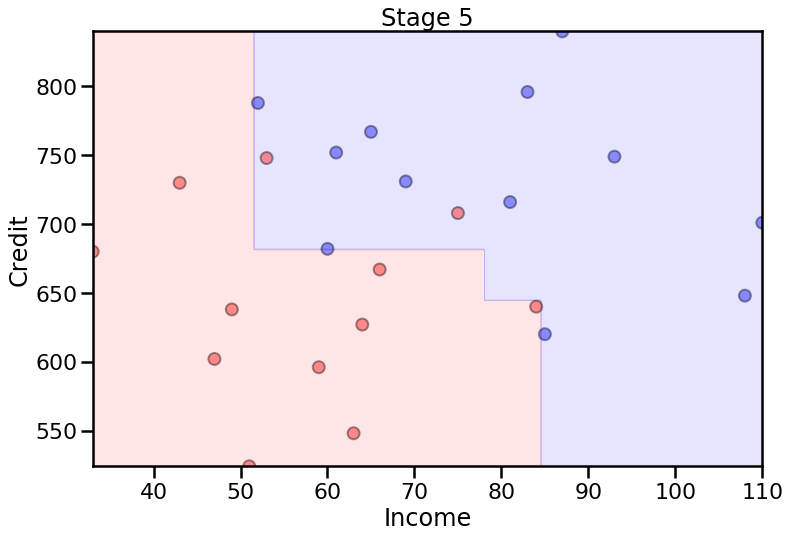

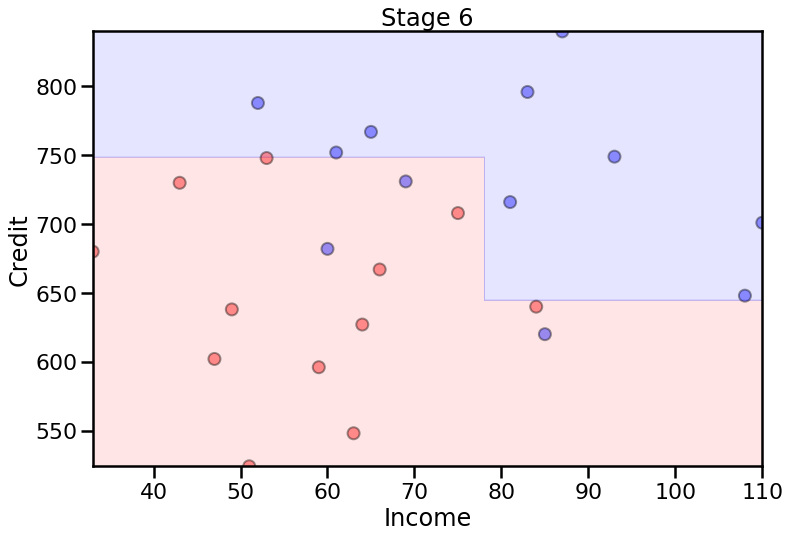

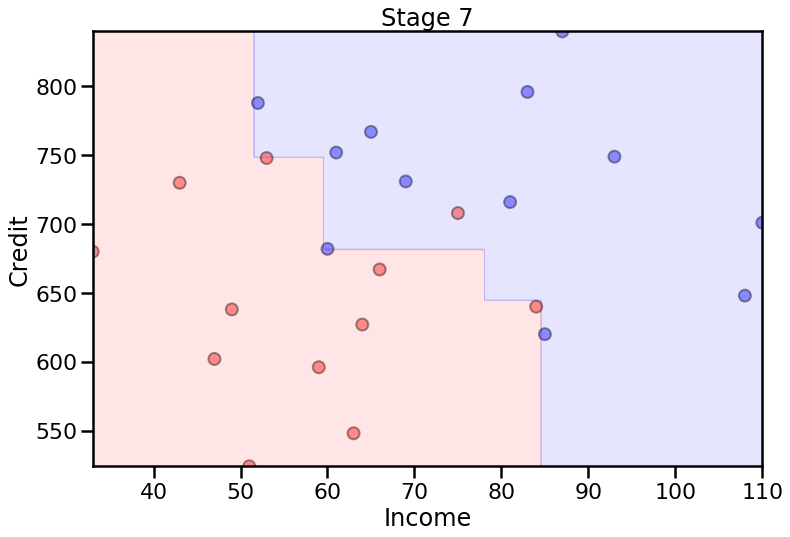

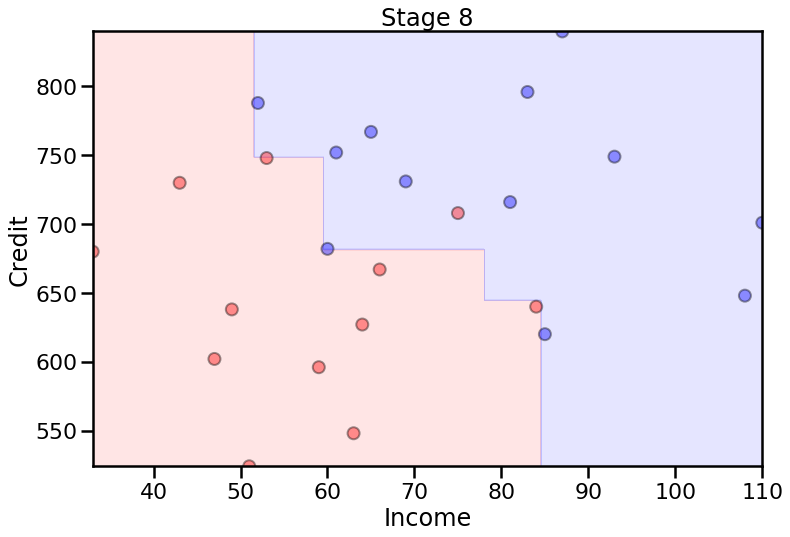

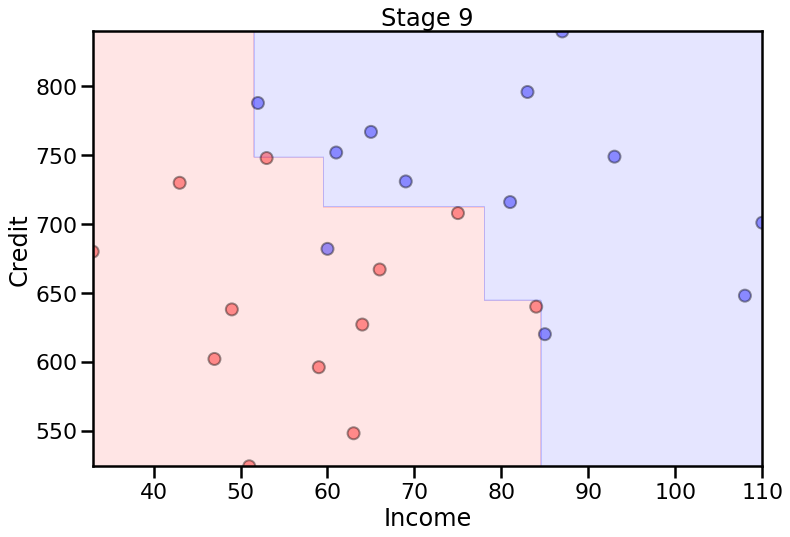

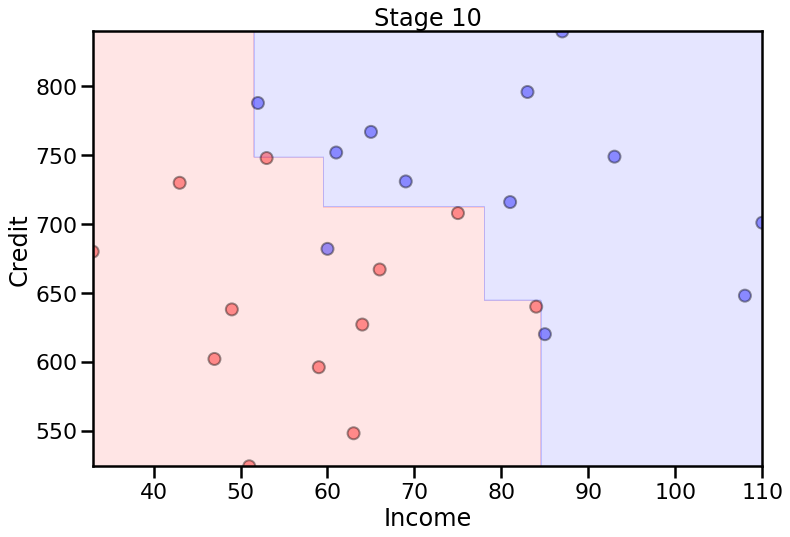

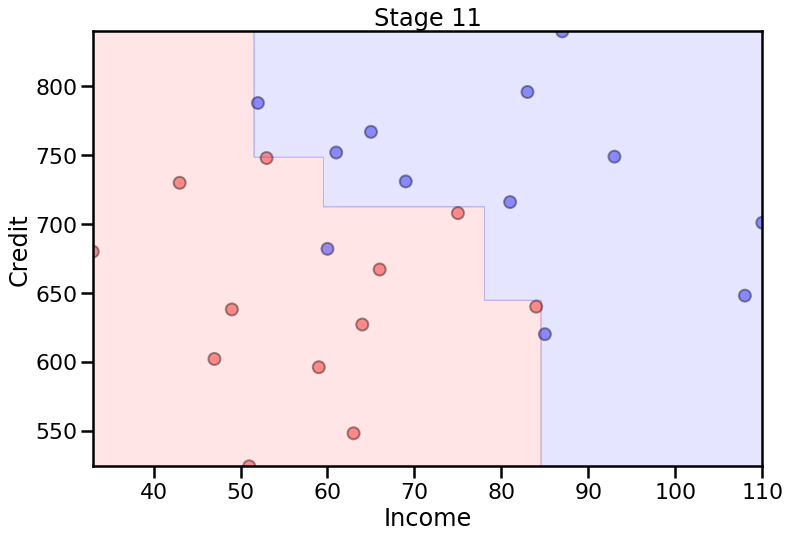

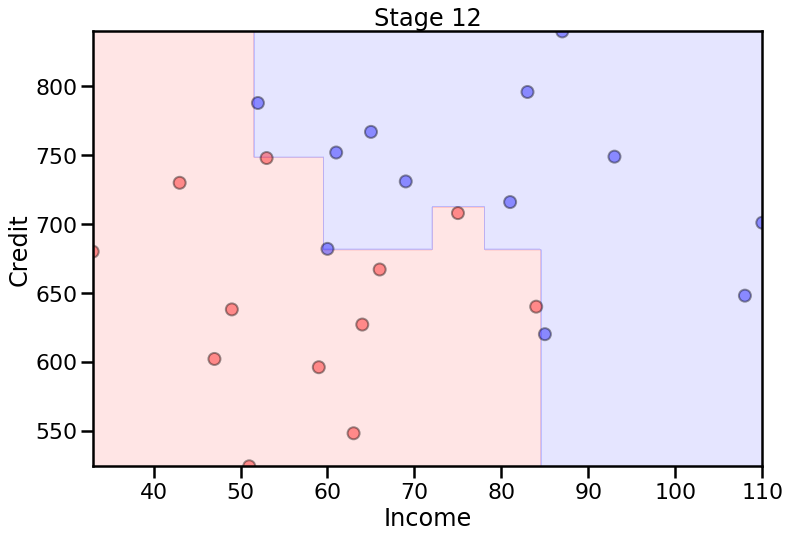

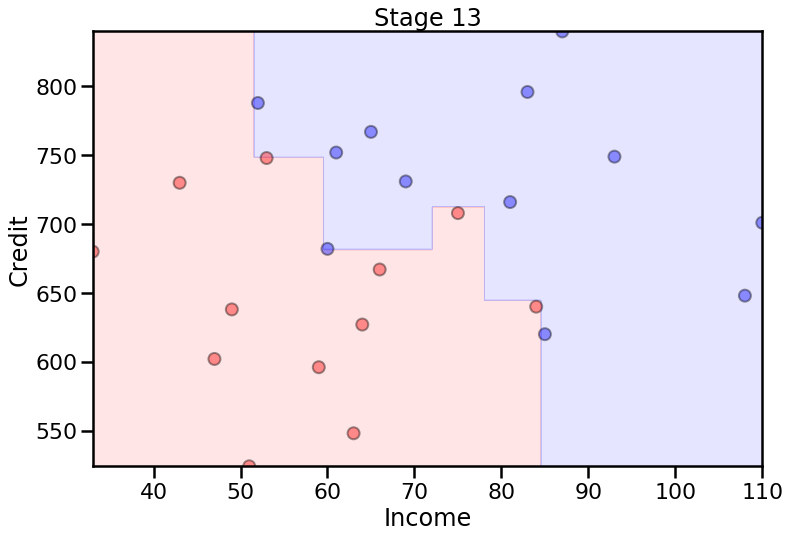

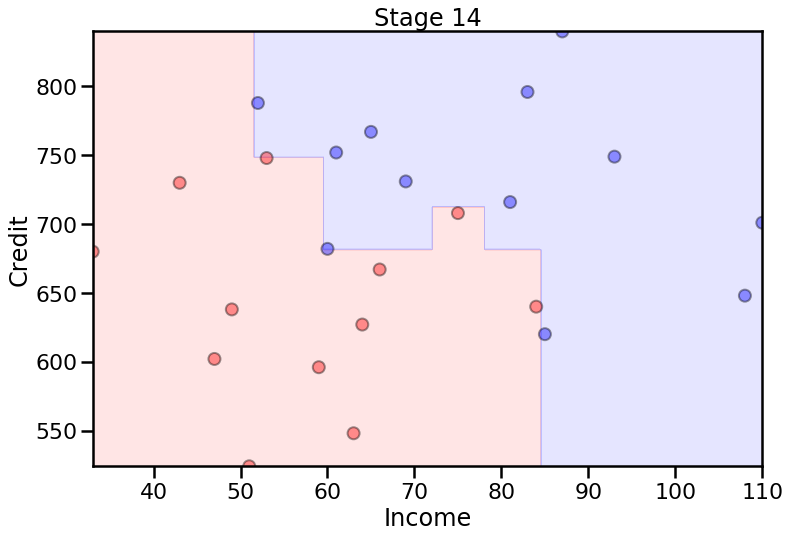

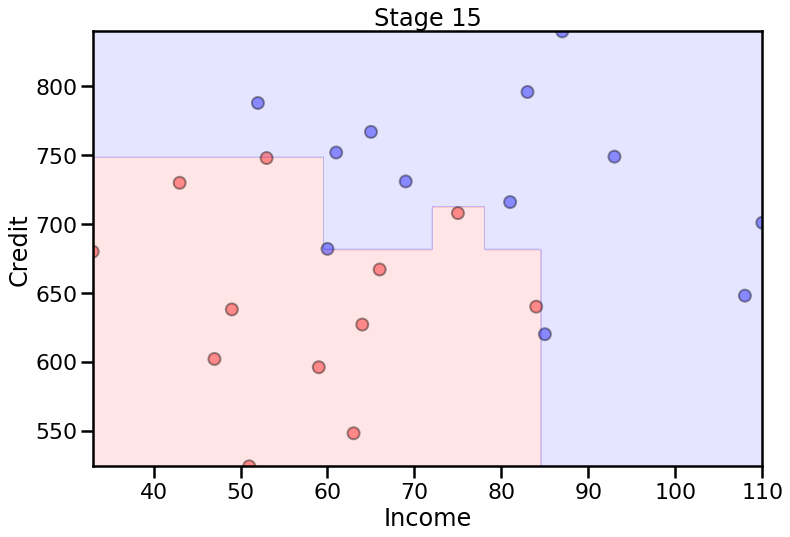

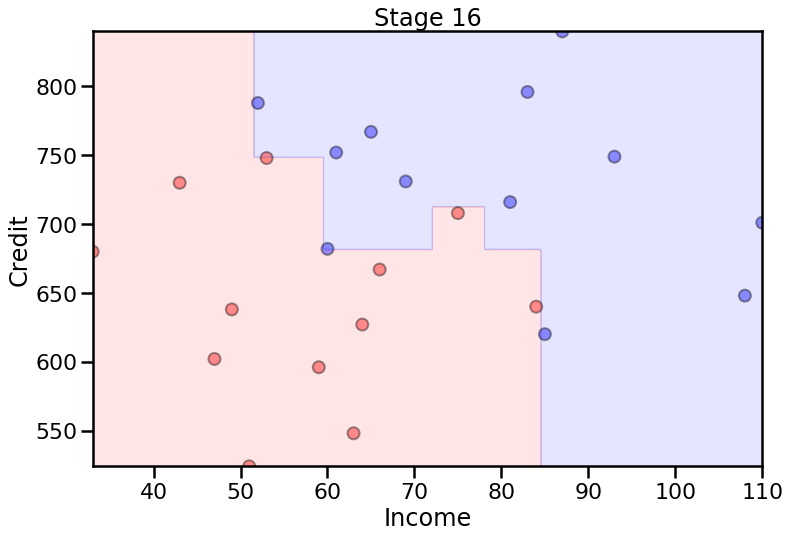

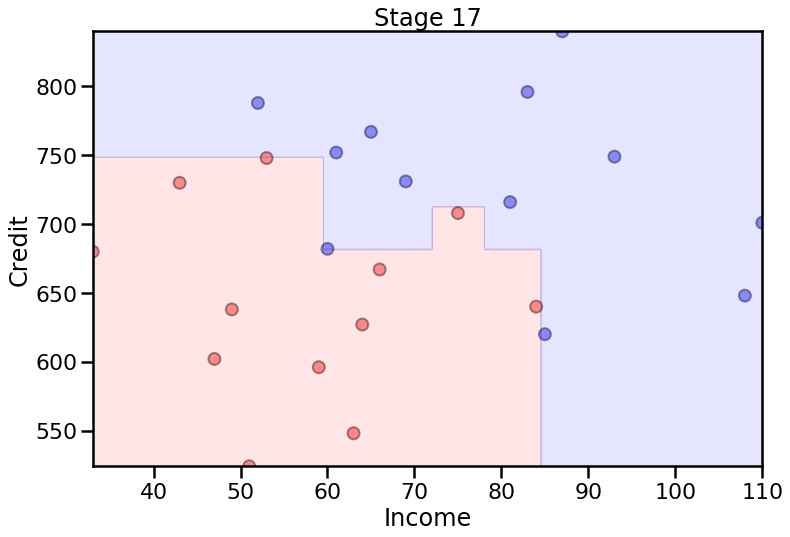

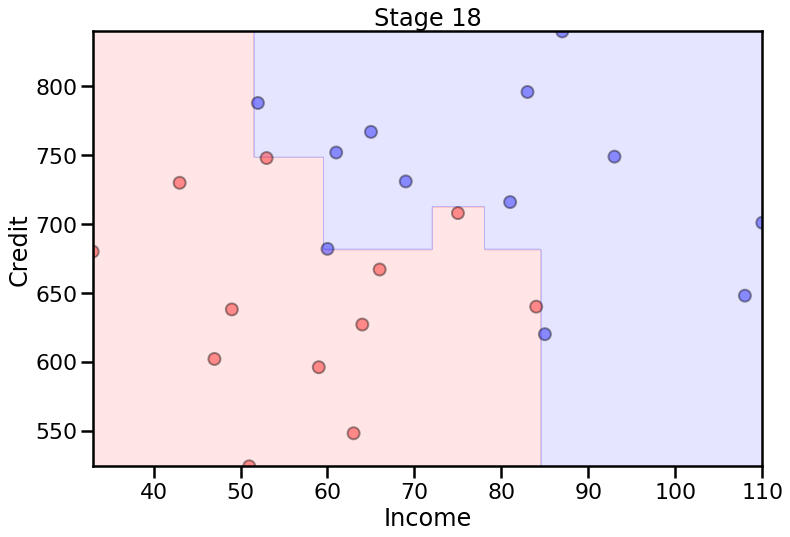

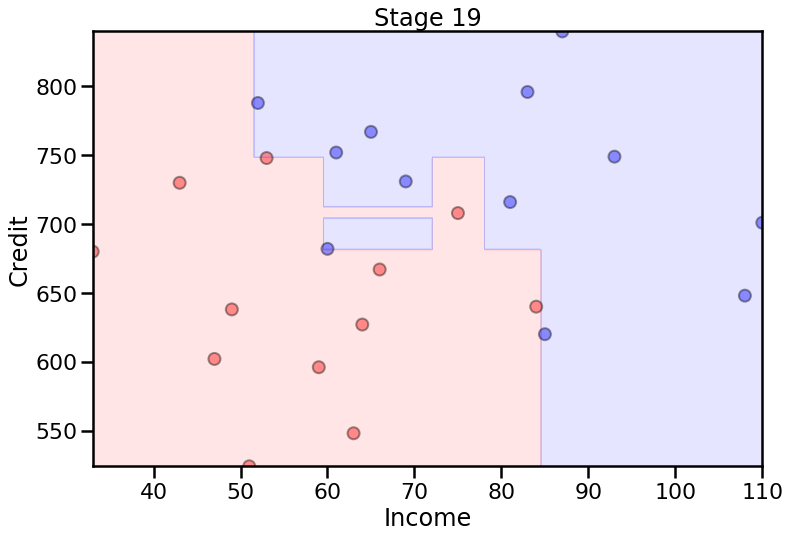

In [23]:
with sns.plotting_context('poster'):
    plot_2gbtree(X, y, dtreegb2, range(20), lab = ['Income', 'Credit'])

In [24]:
ts2 = [t for i, t in enumerate(dtreegb2.estimators_) if i in range(20)]
ts2

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1280418355, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=898958308, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_le

In [25]:
wt2 = [t for i, t in enumerate(dtreegb2.estimator_weights_) if i in range(20)]
wt2

[1.3350010667323402,
 1.6739764335716716,
 0.7691330875378674,
 1.426801345399708,
 0.8521825119318752,
 1.1154985599095335,
 0.7681162970435744,
 1.068736443151714,
 0.7757304320497743,
 0.7706781280699707,
 0.5840926401346908,
 0.46626023149098444,
 0.7537338000285524,
 0.8528802552628938,
 0.788400758014774,
 0.34755306370153394,
 0.5787094987957725,
 0.7521987210752203,
 0.5415276960174995,
 0.5820667652092906]

In [26]:
sw2 = [dtreegb2.sw_[i,:] for i in range(20)]
sw2

[array([0.04166667, 0.04166667, 0.04166667, 0.04166667, 0.04166667,
        0.04166667, 0.04166667, 0.04166667, 0.04166667, 0.04166667,
        0.04166667, 0.04166667, 0.04166667, 0.04166667, 0.04166667,
        0.04166667, 0.04166667, 0.04166667, 0.04166667, 0.04166667,
        0.04166667, 0.04166667, 0.04166667, 0.04166667]),
 array([0.1       , 0.1       , 0.02631579, 0.02631579, 0.02631579,
        0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579,
        0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579,
        0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579,
        0.02631579, 0.1       , 0.1       , 0.1       ]),
 array([0.059375  , 0.059375  , 0.08333333, 0.015625  , 0.08333333,
        0.015625  , 0.015625  , 0.08333333, 0.08333333, 0.08333333,
        0.015625  , 0.015625  , 0.015625  , 0.015625  , 0.015625  ,
        0.015625  , 0.015625  , 0.08333333, 0.015625  , 0.015625  ,
        0.015625  , 0.059375  , 0.059375  , 0.059375  ]),
 array([0.

In [27]:
expymult = lambda b, x: np.exp(b*x)

In [28]:
bw = sw2[0][0]
bw

0.041666666666666664

In [30]:
oldwts=sw2[0]
for tr in ts2:
    oldepsilon = 1 - tr.score(X,y)
    predicts = tr.predict(X) != y
    #print(predicts)
    epsilon = np.dot(predicts, oldwts)
    print("weighted error rate", epsilon)
    alpha = learn*np.log((1 -epsilon)/epsilon)
    print("alpha = ", alpha)
    wts = expymult(predicts, alpha)*oldwts
    #print("wts",wts)
    #print("np.sum(wts)", np.sum(wts))
    oldwts = wts/np.sum(wts)
    print("normed wts", oldwts)
    #print("alpha*0.2*2", alpha*0.2*2)
    #print("e to the +/-i/2 alpha", np.exp(alpha/2.), np.exp(-alpha/2.))

weighted error rate 0.20833333333333331
alpha =  1.3350010667323402
normed wts [0.1        0.1        0.02631579 0.02631579 0.02631579 0.02631579
 0.02631579 0.02631579 0.02631579 0.02631579 0.02631579 0.02631579
 0.02631579 0.02631579 0.02631579 0.02631579 0.02631579 0.02631579
 0.02631579 0.02631579 0.02631579 0.1        0.1        0.1       ]
weighted error rate 0.15789473684210528
alpha =  1.6739764335716714
normed wts [0.059375   0.059375   0.08333333 0.015625   0.08333333 0.015625
 0.015625   0.08333333 0.08333333 0.08333333 0.015625   0.015625
 0.015625   0.015625   0.015625   0.015625   0.015625   0.08333333
 0.015625   0.015625   0.015625   0.059375   0.059375   0.059375  ]
weighted error rate 0.3166666666666667
alpha =  0.7691330875378671
normed wts [0.09375    0.09375    0.13157895 0.02467105 0.13157895 0.02467105
 0.01143293 0.06097561 0.06097561 0.06097561 0.01143293 0.01143293
 0.01143293 0.01143293 0.01143293 0.01143293 0.01143293 0.06097561
 0.01143293 0.01143293 0.0114

In [35]:
def plot_2tree2(X, y, clf, i, wts, bw, w, lab = ['Feature 1', 'Feature 2'], alpha=0.1):
    # Create a meshgrid as our test data
    ax= plt.figure()
    plot_step_x= 0.1
    plot_step_y= 1
    xmin, xmax= X[:,0].min(), X[:,0].max()
    ymin, ymax= X[:,1].min(), X[:,1].max()
    xx, yy = np.meshgrid(np.arange(xmin, xmax, plot_step_x), np.arange(ymin, ymax, plot_step_y) )

    # Re-cast every coordinate in the meshgrid as a 2D point
    Xplot= np.c_[xx.ravel(), yy.ravel()]


    # Predict the class
    Z = clf.predict( Xplot )

    # Re-shape the results
    Z= Z.reshape( xx.shape )
    cs = plt.contourf(xx, yy, Z, cmap= cmap_light, alpha=0.3)
    print("ZZZ", Z[0][0])
    # Overlay training samples
    scsz = np.rint(100*(wts/np.mean(wts))**2)
    #print(wts/bw)
    print(scsz)
    print(clf.predict(X))
    print(y)
    plt.scatter(X[:, 0], X[:, 1], c=y-1, s=scsz, cmap=cmap_bold, alpha=0.2,edgecolor=None) 
    plt.scatter(X[:, 0], X[:, 1], c=y-1, s=100, cmap=cmap_bold, alpha=0.2,edgecolor='k', lw=1) 
    
    plt.xlabel(lab[0])
    plt.ylabel(lab[1])
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title("Stage {}, weight {}".format(i, w))
    plt.savefig("figs/dt{0:02d}.png".format(i))
    return ax, xmin, xmax, ymin, ymax

In [36]:
tow = zip(range(20), wt2)
for tup in tow:
    print(tup)

(0, 1.3350010667323402)
(1, 1.6739764335716716)
(2, 0.7691330875378674)
(3, 1.426801345399708)
(4, 0.8521825119318752)
(5, 1.1154985599095335)
(6, 0.7681162970435744)
(7, 1.068736443151714)
(8, 0.7757304320497743)
(9, 0.7706781280699707)
(10, 0.5840926401346908)
(11, 0.46626023149098444)
(12, 0.7537338000285524)
(13, 0.8528802552628938)
(14, 0.788400758014774)
(15, 0.34755306370153394)
(16, 0.5787094987957725)
(17, 0.7521987210752203)
(18, 0.5415276960174995)
(19, 0.5820667652092906)


ZZZ 0
[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
[0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
ZZZ 0
[576. 576.  40.  40.  40.  40.  40.  40.  40.  40.  40.  40.  40.  40.
  40.  40.  40.  40.  40.  40.  40. 576. 576. 576.]
[1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
ZZZ 0
[203. 203. 400.  14. 400.  14.  14. 400. 400. 400.  14.  14.  14.  14.
  14.  14.  14. 400.  14.  14.  14. 203. 203. 203.]
[0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
ZZZ 0
[506. 506. 997.  35. 997.  35.   8. 214. 214. 214.   8.   8.   8.   8.
   8.   8.   8. 214.   8.   8.   8. 109. 109. 109.]
[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1]
[1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
ZZZ 0
[ 195.  195.  383.   13.  383.   13.    3.   82.   82.   82.    3.    3.
    3

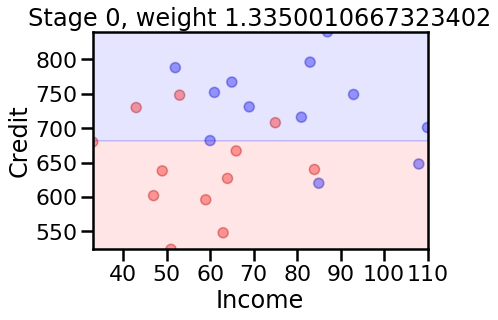

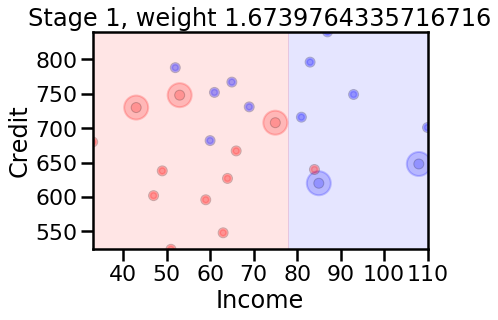

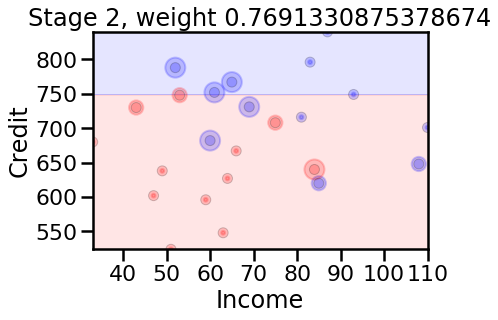

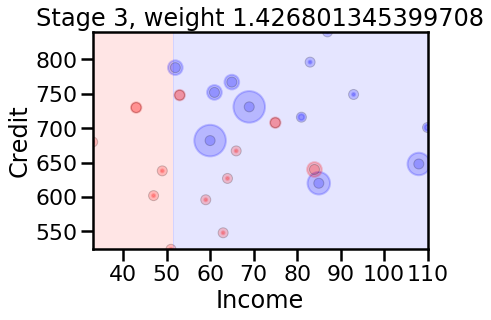

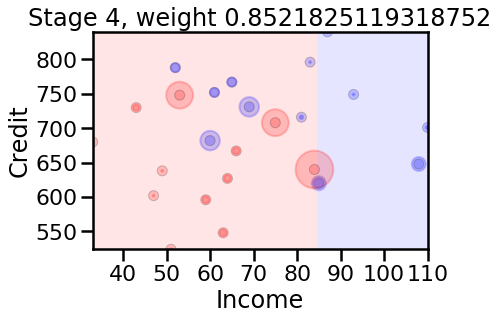

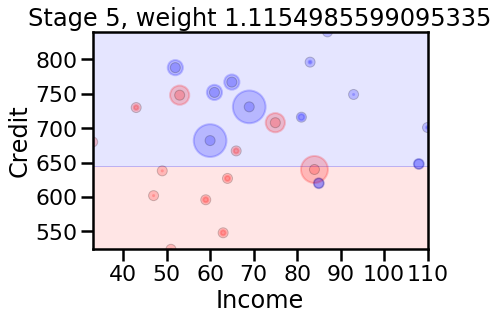

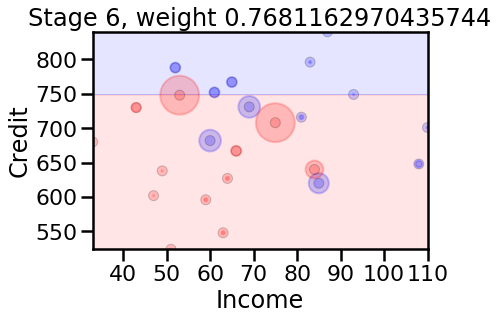

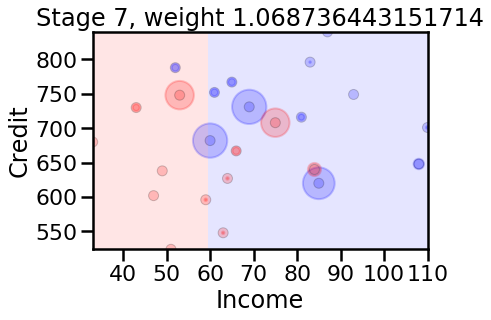

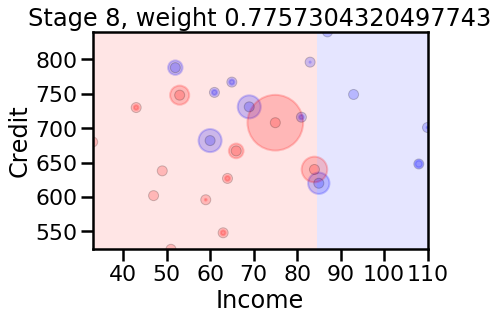

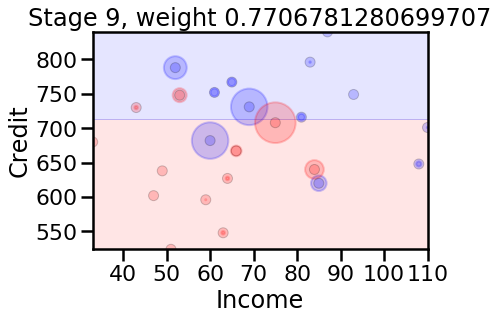

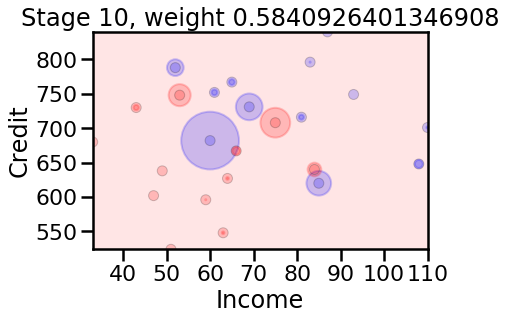

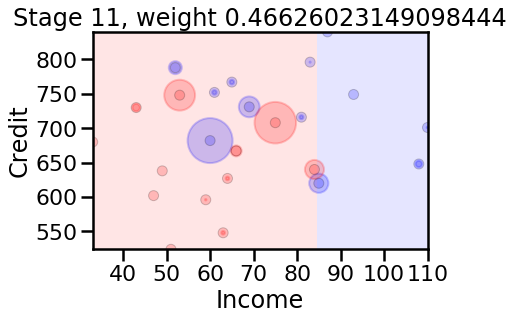

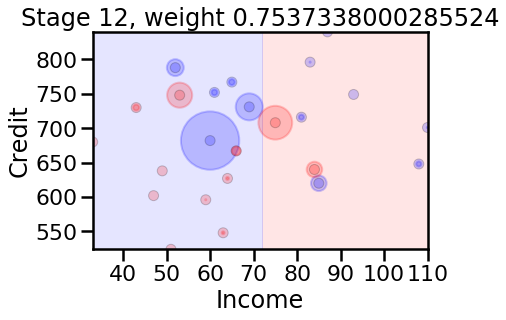

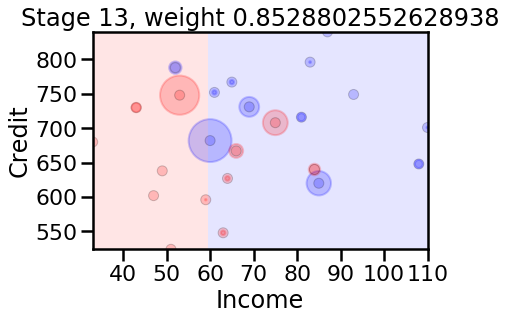

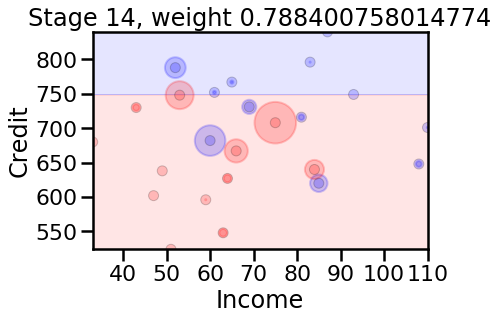

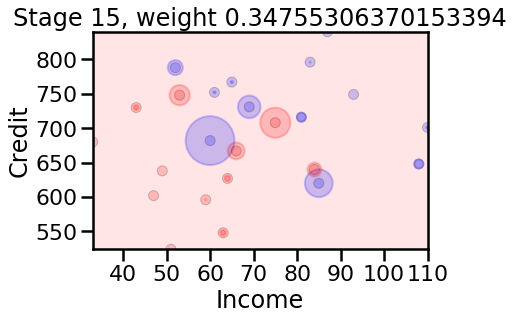

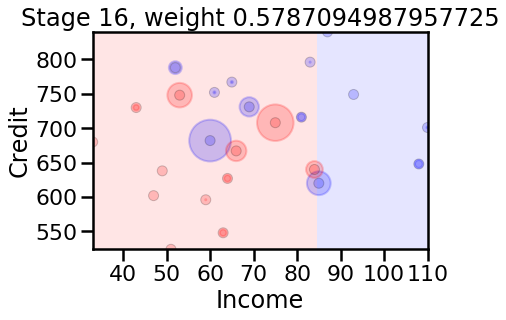

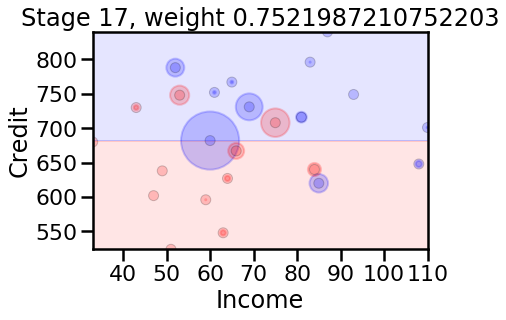

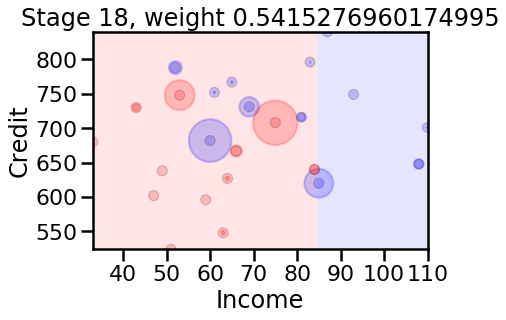

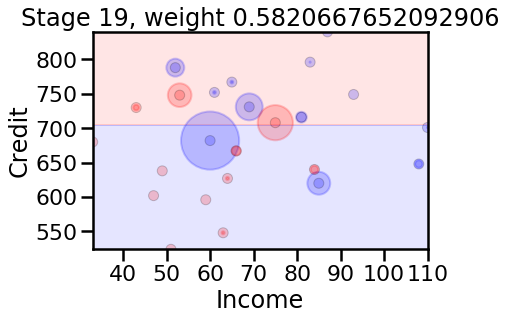

In [37]:
with sns.plotting_context('poster'):
    for i, t, w, s in zip(range(20), ts2, wt2, sw2):
        #plotlinestree2(X, y, t, i, s, bw, w, lab = ['Income', 'Credit'])
        plot_2tree2(X, y, t, i, s, bw, w, lab = ['Income', 'Credit'])
        plt.title("Stage {}, weight {}".format(i, w))


In [38]:
dtreegb2.estimator_weights_

array([1.33500107, 1.67397643, 0.76913309, 1.42680135, 0.85218251,
       1.11549856, 0.7681163 , 1.06873644, 0.77573043, 0.77067813,
       0.58409264, 0.46626023, 0.7537338 , 0.85288026, 0.78840076,
       0.34755306, 0.5787095 , 0.75219872, 0.5415277 , 0.58206677])